[<img src="https://user-images.githubusercontent.com/79705081/109483674-d3eea600-7a7f-11eb-9a25-58c50da4cde9.png">](http://edenlibrary.ai/)

PP-YOLO and YOLO-NAS are both advancements in the field of object detection that build upon the original YOLO (You Only Look Once) framework, which is known for its speed and efficiency in detecting objects in images or video streams.

### PP-YOLO

PP-YOLO, or PaddlePaddle YOLO, is an enhanced version of the YOLO model developed by Baidu. It aims to improve the performance of the original YOLOv3 model in terms of both speed and accuracy. PP-YOLO incorporates several modifications and optimizations such as:
- **Better backbone:** Uses ResNet50Vd as the backbone network instead of Darknet-53, improving feature extraction capabilities.
- **Path aggregation network (PAN):** Enhances the fusion of features from different scales.
- **Mish activation:** Replaces the traditional activation functions with Mish, which may help in reducing the risk of vanishing gradients.
- **Larger batch size and learning rate warmup:** Improves the training process to achieve better accuracy.
- **DropBlock regularization:** A form of structured dropout that helps in regularizing the model, particularly beneficial for convolutional networks.
- **Enhanced data augmentation:** Incorporates strategies like mosaic augmentation and mixup to increase the diversity of training data, which can lead to better generalization.

These improvements make PP-YOLO a competitive choice for real-time object detection, offering a good balance between speed and accuracy.

### YOLO-NAS

YOLO-NAS (Neural Architecture Search for YOLO) is an approach that applies neural architecture search (NAS) to the YOLO framework to automatically discover optimal network architectures for object detection tasks. NAS is a technique in machine learning that involves using algorithms (often reinforcement learning or evolutionary algorithms) to automate the design of neural network architectures.

YOLO-NAS aims to optimize various aspects of the YOLO architecture, such as the backbone network, the feature pyramid networks (FPNs), and the head of the network for predicting bounding boxes and class probabilities. By searching for the most effective configurations and structures, YOLO-NAS seeks to enhance the performance of YOLO models without significantly increasing computational complexity. This can lead to more efficient models that maintain high accuracy while being faster or requiring fewer resources, making them suitable for deployment in environments with limited computational capacity.

Both PP-YOLO and YOLO-NAS illustrate the ongoing efforts to improve object detection models by making them faster, more accurate, and more efficient, catering to the increasing demands of applications in surveillance, autonomous vehicles, and many other areas.

In [ ]:
!pip install -q super-gradients
!pip install -q supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to bu

**Cell to avoid some temporal problems on Google Colab**

In [ ]:
import os
import locale
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
import torch
from super_gradients.training import models
from super_gradients.common.object_names import Models
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val
from super_gradients.training import Trainer
from super_gradients.training.losses import YoloXDetectionLoss
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

import supervision as sv
from tqdm import tqdm
import cv2

import random
import shutil

from IPython.display import clear_output
random.seed(2024)

[2024-01-17 13:09:14] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2024-01-17 13:09:14] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-01-17 13:09:14] INFO - utils.py - NumExpr defaulting to 8 threads.
[2024-01-17 13:09:21] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-01-17 13:09:21] WARNING - export.py - Failed to import pytorch_quantization
[2024-01-17 13:09:21] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-01-17 13:09:21] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2024-01-17 13:09:21] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2024-01-17 13:09:21] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2024-01-17 13:09:21] WARNING - env_sanity_check.py - Failed to verify installed packages: sphinx-rtd-theme required but not found
[2024-01-17 13:09:21] WARNING - env_sanity_check.py - Failed to verify i

In [ ]:
device = 'cuda' if torch.cuda.is_available() else "cpu"

**Cell to avoid some temporal problems on Google Colab**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


**Select your own YOLO-structure FOLDER**

Dataset **NOT** included in the shared folder

In [ ]:
%%capture
!unzip "/content/gdrive/MyDrive/Colab Notebooks/adata/detection/smart-droplets-rumex-yolo.zip"
!rm -rf __MACOSX

**Detection Hyper-parameters**

In [ ]:
NUM_EXPERIMENTS = 1
CONFIDENCE_TRESHOLD = 0.6
MAX_IMAGE_COUNT = 10
BATCH_SIZE = 16
NUM_EPOCHS = 30

**Filesystem Metadata**

In [ ]:
dataset_params = {
    'data_dir':'/content/smart-droplets-rumex-yolo',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': ['Rumex']
}

**Dataset and DataLoaders Metadata**

In [ ]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':BATCH_SIZE,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':BATCH_SIZE,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':BATCH_SIZE,
        'num_workers':2
    }
)

clear_output()

In [ ]:
#train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42

**Training Hyper-parameters**

In [ ]:
train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-5, #1e-6,
    "lr_warmup_epochs": 2,
    "initial_lr": 1e-3,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": NUM_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.5
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

Indexing dataset annotations: 100%|██████████| 49/49 [00:00<00:00, 4040.60it/s]


**Available Detectors**

In [ ]:
#Models.YOLOX_L
#Models.YOLO_NAS_L
#Models.PP_YOLOE_L

**Auxiliar Fuctions**

In [ ]:
def get_predictions(ds, best_model):
    predictions = {}

    for image_name, image in tqdm(ds.images.items()):
        result = list(best_model.predict(cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
                                         conf=CONFIDENCE_TRESHOLD))[0]
        detections = sv.Detections(
            xyxy=result.prediction.bboxes_xyxy,
            confidence=result.prediction.confidence,
            class_id=result.prediction.labels.astype(int)
        )
        predictions[image_name] = detections

    return predictions

In [ ]:
def get_images_titles(ds, predictions):
    n = min(MAX_IMAGE_COUNT, len(ds.images))

    keys = list(ds.images.keys())
    keys = random.sample(keys, n)

    box_annotator = sv.BoxAnnotator(thickness=20,
                                    color=sv.ColorPalette.from_hex(['#ff0000', '#00ff00', '#0000ff']),
                                    text_thickness=5,
                                    text_scale=5)

    images = []
    titles = []

    for key in keys:
        frame_with_annotations = box_annotator.annotate(
            scene=ds.images[key].copy(),
            detections=ds.annotations[key],
            skip_label=True
        )
        images.append(frame_with_annotations)
        titles.append('annotations')

        labels = [f"{confidence:0.2f}" for _, mask, confidence, class_id, _ in predictions[key]]
        frame_with_predictions = box_annotator.annotate(
            scene=ds.images[key].copy(),
            detections=predictions[key],
            labels=labels
        )
        images.append(frame_with_predictions)
        titles.append('predictions')

    return images, titles, n

**Fine-tuning the YOLO-based model**

In [ ]:
CHECKPOINT_DIR = '0_checkpoints'
EXPERIMENT_NAME = 'pp-yolo-l_run'

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)
model = models.get(Models.PP_YOLOE_L,
                    num_classes=len(dataset_params['classes']),
                    pretrained_weights="coco"
                    )
trainer.train(model=model,
                training_params=train_params,
                train_loader=train_data,
                valid_loader=val_data)

Downloading: "https://deci-pretrained-models.s3.amazonaws.com/ppyolo_e/CSPResNetb_l_pretrained.pth" to /root/.cache/torch/hub/checkpoints/CSPResNetb_l_pretrained.pth
100%|██████████| 80.9M/80.9M [00:07<00:00, 11.5MB/s]
Downloading: "https://sghub.deci.ai/models/ppyoloe_l_coco.pth" to /root/.cache/torch/hub/checkpoints/ppyoloe_l_coco.pth
100%|██████████| 827M/827M [00:51<00:00, 16.8MB/s]
[2024-01-17 13:11:35] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture ppyoloe_l
[2024-01-17 13:11:36] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240117_131136_044001`
[2024-01-17 13:11:36] INFO - sg_trainer.py - Checkpoints directory: 0_checkpoints/pp-yolo-l_run/RUN_20240117_131136_044001
[2024-01-17 13:11:36] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
/usr/local/lib/python3.10/dist-packages/super_gradients/common/registry/registry.py:72: DeprecationWarning: Object name `linear_epoch_step` is now deprecate

The console stream is now moved to 0_checkpoints/pp-yolo-l_run/RUN_20240117_131136_044001/console_Jan17_13_11_36.txt


[2024-01-17 13:12:05] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            90         (len(train_set))
    - Batch size per GPU:           16         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             16         (num_gpus * batch_size)
    - Effective Batch size:         16         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         5          (len(train_loader))
    - Gradient updates per epoch:   5          (len(train_loader) / batch_accumulate)
    - Model: PPYoloE_L  (53.12M parameters, 53.12M optimized)
    - Learning Rates and Weight Decays:
      - default: (53.12M parameters). LR: 0.001 (53.12M parameters) WD: 0.0, (73.23K parameters), WD: 0.0001, (53.05M parameters)

[2024-01-17 13:13:17] INFO - base_sg_logger.py - Checkpoint saved in

**Evaluation the Detector**

[2024-01-17 13:59:08] INFO - checkpoint_utils.py - Successfully loaded model weights from 0_checkpoints/pp-yolo-l_run/RUN_20240117_131136_044001/ckpt_best.pth EMA checkpoint.
100%|██████████| 49/49 [00:46<00:00,  1.05it/s]


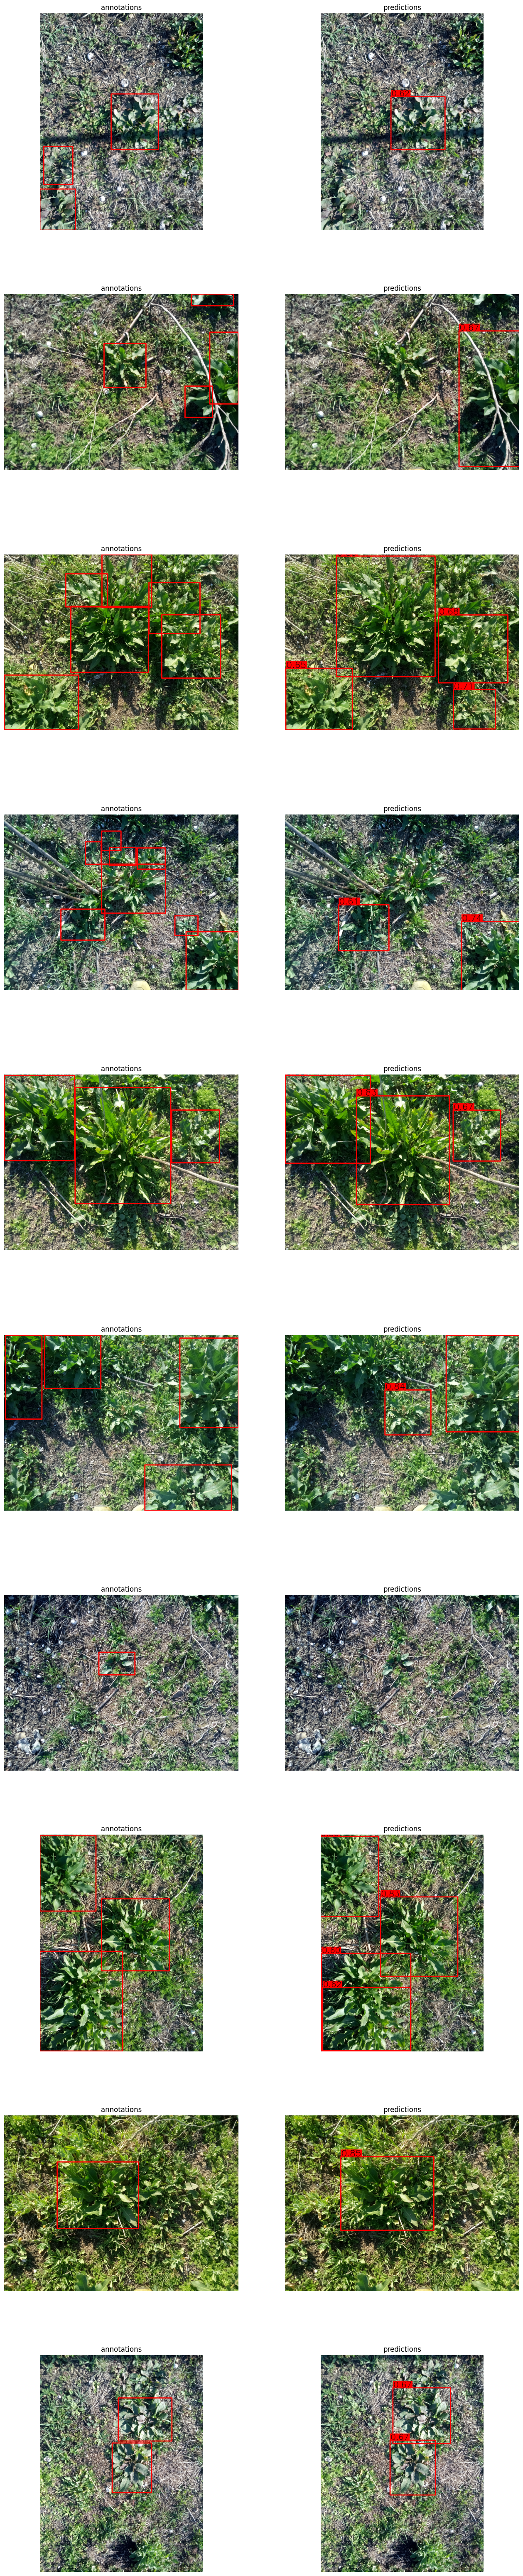

In [ ]:
best_model = models.get(Models.PP_YOLOE_L,
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path=f'0_checkpoints/{EXPERIMENT_NAME}/{sorted(os.listdir(os.path.join(CHECKPOINT_DIR, EXPERIMENT_NAME)))[-1]}/ckpt_best.pth')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_params['data_dir']}/test/images",
    annotations_directory_path=f"{dataset_params['data_dir']}/test/labels",
    data_yaml_path=f"{dataset_params['data_dir']}/data.yaml",
    force_masks=False
)

predictions = get_predictions(ds, best_model)
images, titles, n = get_images_titles(ds, predictions)
%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n, 2), size=(2 * 8, n * 8))

**Reference**: https://blog.roboflow.com/yolo-nas-how-to-train-on-custom-dataset/